<a href="https://colab.research.google.com/github/PapaJacque16/MLA_AMM/blob/main/MLA5_AMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Machine Learning Assignment 5

####Aaron McCarley

####CS430-ON

####Machine Learning in the Cloud

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


###Import for specific models
####Include imports for Voting, Bagging, Random Forest and AdaBoost classifiers
####Include imports for classification_report and ConfusionMatrixDisplay



In [3]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [4]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

###Statistics and Visual Exploration
####Create bar plots to display the number of land types for landsat_train and landsat_test (two different plots).

###Acquire Data
####Load the landsat_train.csv into a data frame named landsat_train and the landsat_test.csv into a dataframe named landsat_test.

###Problem 1

In [22]:
landsat_train = pd.read_csv('/content/gdrive/MyDrive/CS430/landsat_train.csv')
landsat_train.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


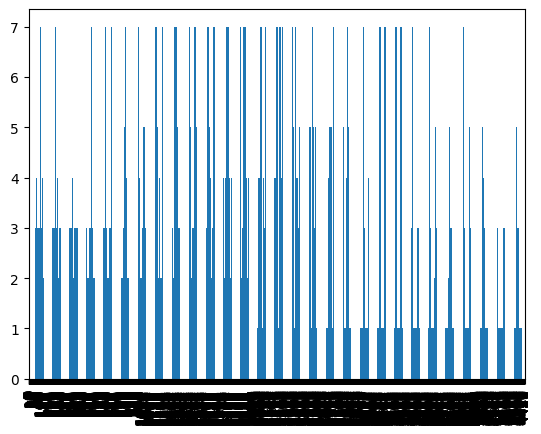

In [27]:
size = (20,10)
figure, ax1 = plt.subplots()
landsat_train.iloc[:,36].plot.bar(fig = figure, ax = ax1);

In [29]:
landsat_test = pd.read_csv('/content/gdrive/MyDrive/CS430/landsat_test.csv')
landsat_test.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,80,102,102,79,76,102,102,79,76,102,...,87,79,107,109,87,79,107,113,87,3
1,76,102,102,79,76,102,106,83,76,102,...,87,79,107,113,87,79,103,104,83,3
2,80,98,106,79,76,94,102,76,76,94,...,79,79,95,100,79,79,95,96,75,4
3,76,94,102,76,76,94,102,76,76,94,...,79,79,95,96,75,79,95,100,75,4
4,76,94,102,76,76,94,102,76,76,89,...,75,79,95,100,75,75,95,100,79,4


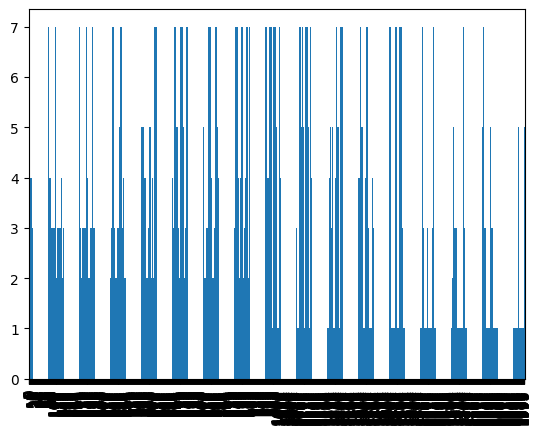

In [30]:
size = (20,10)
figure, ax1 = plt.subplots()
landsat_test.iloc[:,36].plot.bar(fig = figure, ax = ax1);

###Splitting Data into Train/Test - the data is already split into train/test, but you will have to manually split it further.
####Create a data frame called X_train with all columns from landsat_train except for land_type.


In [40]:
X_train = landsat_train.drop('land_type',axis=1)
X_train

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra1,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2
0,92,115,120,94,84,102,106,79,84,102,...,134,104,88,121,128,100,84,107,113,87
1,84,102,106,79,84,102,102,83,80,102,...,128,100,84,107,113,87,84,99,104,79
2,84,102,102,83,80,102,102,79,84,94,...,113,87,84,99,104,79,84,99,104,79
3,80,102,102,79,84,94,102,79,80,94,...,104,79,84,99,104,79,84,103,104,79
4,84,94,102,79,80,94,98,76,80,102,...,104,79,84,103,104,79,79,107,109,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4430,56,64,108,96,64,71,108,96,68,75,...,108,92,66,83,108,96,66,87,104,89
4431,64,71,108,96,68,75,108,96,71,87,...,108,96,66,87,104,89,63,87,104,89
4432,68,75,108,96,71,87,108,88,71,91,...,104,89,63,87,104,89,70,100,104,85
4433,71,87,108,88,71,91,100,81,76,95,...,104,89,70,100,104,85,70,91,104,85


####Create a data frame called X_test with all columns from landsat_test except for land_type.

In [41]:
X_test = landsat_test.drop('land_type',axis=1)
X_test

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra1,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2
0,80,102,102,79,76,102,102,79,76,102,...,109,87,79,107,109,87,79,107,113,87
1,76,102,102,79,76,102,106,83,76,102,...,109,87,79,107,113,87,79,103,104,83
2,80,98,106,79,76,94,102,76,76,94,...,104,79,79,95,100,79,79,95,96,75
3,76,94,102,76,76,94,102,76,76,94,...,100,79,79,95,96,75,79,95,100,75
4,76,94,102,76,76,94,102,76,76,89,...,96,75,79,95,100,75,75,95,100,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,60,83,96,85,64,87,100,88,64,83,...,104,92,66,87,108,89,63,83,104,85
1996,64,79,100,85,56,71,96,85,56,68,...,100,85,66,83,100,85,63,83,100,81
1997,56,68,91,81,56,64,91,81,53,64,...,100,81,59,87,96,81,63,83,92,74
1998,56,68,87,74,60,71,91,81,60,64,...,96,74,59,83,92,74,59,83,92,70


####Create a data frame called y_train with the land_type column from landsat_train.

In [46]:
X1 = landsat_train.iloc[:,0:-1]
Y_train = landsat_train['land_type']

####Create a data frame called y_test with the land_type column from landsat_test.

In [47]:
X2 = landsat_test.iloc[:,0:-1]
Y_test = landsat_test['land_type']

###Building the Pipeline
####Create a column transformer that will MinMax scale the numerical variables 

In [75]:
num_attribs = ['top_left_r',	'top_left_g',	'top_left_infra1',	'top_left_infra2',	'top_middle_r',	'top_middle_g',
               'top_middle_infra1',	'top_middle_infra2',	'top_right_r',	'top_right_g',	'bottom_left_infra1',
               'bottom_left_infra2',	'bottom_middle_r',	'bottom_middle_g',	'bottom_middle_infra1',	'bottom_middle_infra2',
               'bottom_right_r',	'bottom_right_g',	'bottom_right_infra1',	'bottom_right_infra2']

####Create a pipeline that will transform the data and then run the RandomForestClassifier algorithm.

In [76]:
col_transform = ColumnTransformer(transformers=[('num', MinMaxScaler(), num_attribs)])

In [92]:
random_forest = Pipeline([('transform', col_transform),('rf', RandomForestClassifier(n_estimators=1000, max_samples=500, bootstrap=True, n_jobs=-1))])

###Executing the Model
####Run the pipeline to fit the RandomForestClassification model.

In [93]:
random_forest.fit(X1,np.ravel(Y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['top_left_r', 'top_left_g',
                                                   'top_left_infra1',
                                                   'top_left_infra2',
                                                   'top_middle_r',
                                                   'top_middle_g',
                                                   'top_middle_infra1',
                                                   'top_middle_infra2',
                                                   'top_right_r', 'top_right_g',
                                                   'bottom_left_infra1',
                                                   'bottom_left_infra2',
                                                   'bottom_middle_r',
                                                   'bottom_middle_g',
                                                   'bottom_middle_infra1',
                                                   'bottom_middle_infra2',
                                                   'bottom_right_r',
                                                   'bottom_right_g',
                                                   'bottom_right_infra1',
                                                   'bottom_right_infra2'])])),
                ('rf',
                 RandomForestClassifier(max_samples=500, n_estimators=1000,
                                        n_jobs=-1))])

In [132]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score

###Evaluating the Model
####Run the pipeline to predict y values from the test data set and save them in a variable called y_pred.

In [133]:
y_pred = random_forest.predict(X_test)

####Use the classification_function to display the precision, recall, and F1 score for each class.

####Use the ConfusionMatrixDisplay function (and associated code) to display a heatmap of the confusion matrix.

              precision    recall  f1-score   support

           1       0.94      0.98      0.96       461
           2       0.96      0.96      0.96       224
           3       0.86      0.94      0.90       397
           4       0.71      0.55      0.62       211
           5       0.90      0.79      0.84       237
           7       0.84      0.87      0.85       470

    accuracy                           0.88      2000
   macro avg       0.87      0.85      0.86      2000
weighted avg       0.87      0.88      0.87      2000



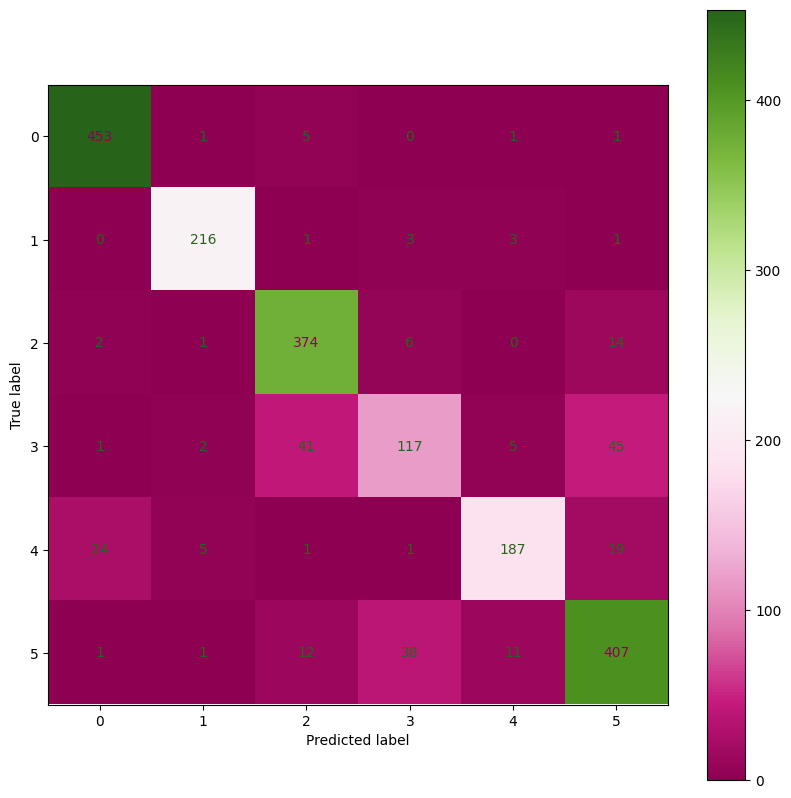

In [139]:
print(classification_report(Y_test, y_pred))
cm = confusion_matrix(Y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap='PiYG');

###Conclusion
####In a Markdown comment, write a conclusion on how suitable you think this model is for predicting the land type.

What this telling us is that the precision recall is still high, and the predictions very accurate when compared to the weighted average.

###Problem 2
####Using the same data set, implement either a Voting Classifier, Bagging Classifier, or Boosting Classifier (only  one, your choice). I have not provided detailed steps for this problem - they will be the same as the previous problem.

###Voting Classifier

In [142]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [144]:
knn = KNeighborsClassifier(n_neighbors=3)
lr = LogisticRegression(max_iter=100000)
svc = SVC(kernel='rbf')

In [145]:
voting = Pipeline([('transform', col_transform),('voting_ensemble', VotingClassifier(estimators=[('knn',knn),('lr',lr),('svc',svc)], voting='hard'))])

###Execute the Model

In [147]:
voting.fit(X_train, np.ravel(Y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['top_left_r', 'top_left_g',
                                                   'top_left_infra1',
                                                   'top_left_infra2',
                                                   'top_middle_r',
                                                   'top_middle_g',
                                                   'top_middle_infra1',
                                                   'top_middle_infra2',
                                                   'top_right_r', 'top_right_g',
                                                   'bottom_left_infra1',
                                                   'bottom_left_infra2',
                                                   'bottom_middle_r',
                                                   'bottom_middle_g',
                                                   'bottom_middle_infra1',
                                                   'bottom_middle_infra2',
                                                   'bottom_right_r',
                                                   'bottom_right_g',
                                                   'bottom_right_infra1',
                                                   'bottom_right_infra2'])])),
                ('voting_ensemble',
                 VotingClassifier(estimators=[('knn',
                                               KNeighborsClassifier(n_neighbors=3)),
                                              ('lr',
                                               LogisticRegression(max_iter=100000)),
                                              ('svc', SVC())]))])

###Evaluating the Model

In [148]:
y_pred = voting.predict(X_test)

              precision    recall  f1-score   support

           1       0.96      1.00      0.98       461
           2       0.96      0.97      0.96       224
           3       0.84      0.96      0.90       397
           4       0.70      0.47      0.57       211
           5       0.92      0.83      0.87       237
           7       0.84      0.86      0.85       470

    accuracy                           0.88      2000
   macro avg       0.87      0.85      0.85      2000
weighted avg       0.88      0.88      0.87      2000



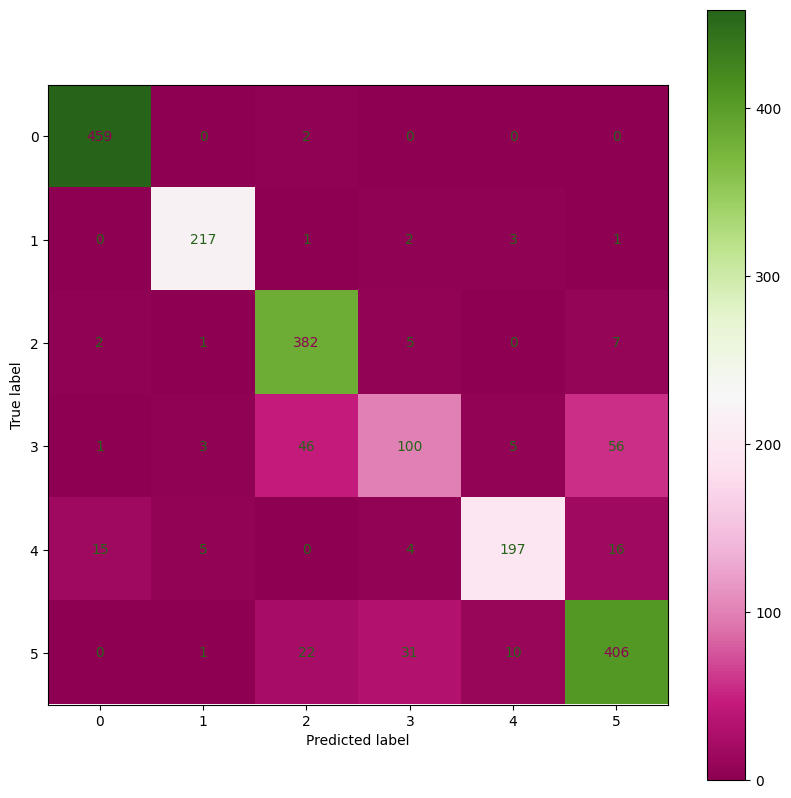

In [151]:
print(classification_report(Y_test, y_pred))
cm = confusion_matrix(Y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap='PiYG');

###Conclusion

####In a Markdown comment, write a conclusion on how suitable you think this model is for predicting the land type.

What this telling us is that the precision recall is even greater, and the predictions have the same level of accuracy when compared to the weighted average.

###Problem 3
####Using the banknote_authentication data set, implement a RandomForest classifier in the same manner as Problem 1. Ensure you include the classification_report and ConfusionMatrixDisplay functions.

In [184]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/banknote_authentication.csv')
df.head()

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


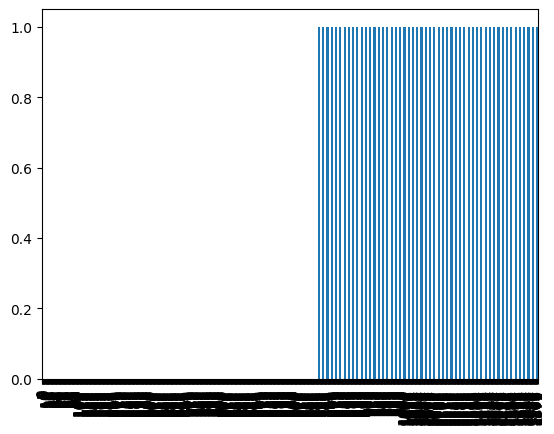

In [183]:
size = (20,10)
figure, ax1 = plt.subplots()
df.iloc[:,4].plot.bar(fig = figure, ax = ax1);

In [187]:
X_train = df.iloc[:,0:-1]
Y_train = df['forgery']

In [188]:
num_attribs = ['variance','skewness',	'curtosis',	'entropy']

In [189]:
col_transform = ColumnTransformer(transformers=[('num', MinMaxScaler(), num_attribs)], remainder='passthrough')

In [190]:
random_forest1 = Pipeline([('transform', col_transform),('rf', RandomForestClassifier(n_estimators=100, max_samples=50, bootstrap=True, n_jobs=-1))])

In [200]:
random_forest1.fit(X_train,np.ravel(Y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('rf', RandomForestClassifier(max_samples=50, n_jobs=-1))])

In [202]:
y_pred1 = random_forest1.predict

              precision    recall  f1-score   support

           1       0.96      1.00      0.98       461
           2       0.96      0.97      0.96       224
           3       0.84      0.96      0.90       397
           4       0.70      0.47      0.57       211
           5       0.92      0.83      0.87       237
           7       0.84      0.86      0.85       470

    accuracy                           0.88      2000
   macro avg       0.87      0.85      0.85      2000
weighted avg       0.88      0.88      0.87      2000



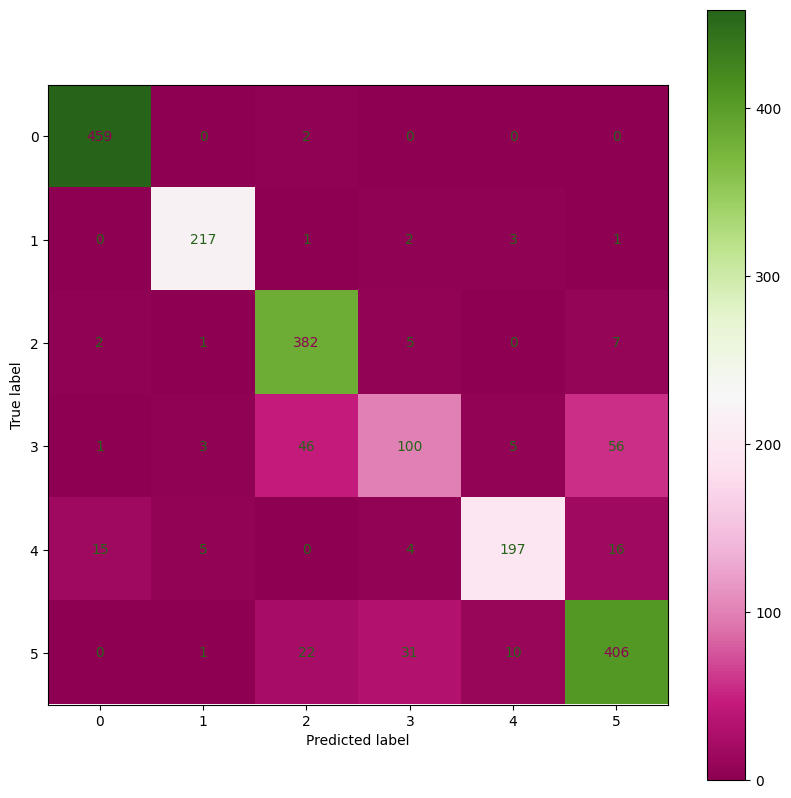

In [203]:
print(classification_report(Y_test, y_pred))
cm = confusion_matrix(Y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap='PiYG');

###Conclusion
####In a Markdown comment, write a conclusion on how suitable you think this model is for predicting the land type.

What this telling us is that the precision is high, and the predictions very accurate when compared to the weighted averages.  Overall it is a good prediction.  